# Traffic Analysis with Visualization

We'll conduct Analysis and Visualizations with a data set about the urban traffic in São Paulo, the most populous city in Brazil. When it comes to traffic congestion, São Paulo is one of the most congested cities in the world.

Traffic jams can be as long as 100 km, and it can take people more than two hours to get to work. The city even has an air-taxi service for those who can afford it.

Our dataset describes the urban traffic in the city São Paulo from December 14, 2009 to December 18, 2009 — from Monday to Friday.

In [1]:
import pandas as pd
traffic = pd.read_csv('traffic_sao_paulo.csv', sep=';')

In [2]:
traffic

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4,1"
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,6"
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,7"
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,2"
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"11,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,23,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,"17,8"
131,24,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,"18,1"
132,25,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,"17,7"
133,26,0,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,"17,4"


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Hour (Coded)                           135 non-null    int64 
 1   Immobilized bus                        135 non-null    int64 
 2   Broken Truck                           135 non-null    int64 
 3   Vehicle excess                         135 non-null    int64 
 4   Accident victim                        135 non-null    int64 
 5   Running over                           135 non-null    int64 
 6   Fire vehicles                          135 non-null    int64 
 7   Occurrence involving freight           135 non-null    int64 
 8   Incident involving dangerous freight   135 non-null    int64 
 9   Lack of electricity                    135 non-null    int64 
 10  Fire                                   135 non-null    int64 
 11  Point of flooding  

Our slowness in traffic column is an object, so we will convert it to a float

In [4]:
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].str.replace(',', '.')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].astype(float)

In [5]:
traffic['Slowness in traffic (%)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 135 entries, 0 to 134
Series name: Slowness in traffic (%)
Non-Null Count  Dtype  
--------------  -----  
135 non-null    float64
dtypes: float64(1)
memory usage: 1.2 KB


In [6]:
print(traffic['Slowness in traffic (%)'].describe())

count    135.000000
mean      10.051852
std        4.363243
min        3.400000
25%        7.400000
50%        9.000000
75%       11.850000
max       23.400000
Name: Slowness in traffic (%), dtype: float64


#### Using a histogram to better understand the column

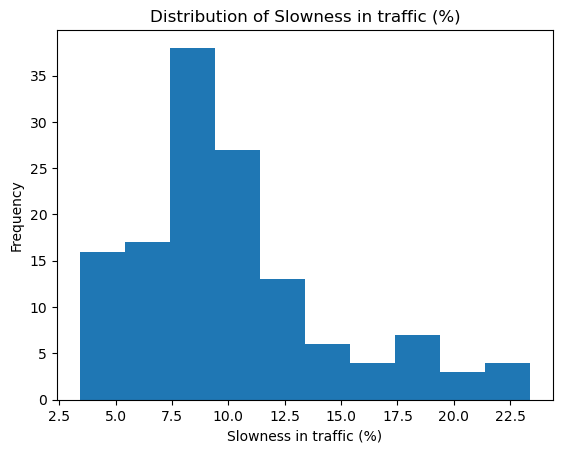

In [7]:
import matplotlib.pyplot as plt
traffic['Slowness in traffic (%)'].plot.hist()
plt.title('Distribution of Slowness in traffic (%)')
plt.xlabel('Slowness in traffic (%)')
plt.show()

From our histogram, we can see that
* The distribution of Slowness in traffic (%) is right skewed
* Most of the values pile up on the left side of the histogram.
* Most of the values are below 15.0%

### Calculating the sum of all the incidents

In [8]:
# we will drop the 'Hour (Coded)' and 'Slowness in traffic (%)').
incidents = traffic.drop(['Hour (Coded)', 'Slowness in traffic (%)'], axis=1)

In [9]:
incidents.sum()

Immobilized bus                           46
Broken Truck                             118
Vehicle excess                             4
Accident victim                           57
Running over                              16
Fire vehicles                              1
Occurrence involving freight               1
Incident involving dangerous freight       1
Lack of electricity                       16
Fire                                       1
Point of flooding                         16
Manifestations                             7
Defect in the network of trolleybuses     31
Tree on the road                           6
Semaphore off                             17
Intermittent Semaphore                     2
dtype: int64

In [10]:
print(type(incidents.sum()))

<class 'pandas.core.series.Series'>


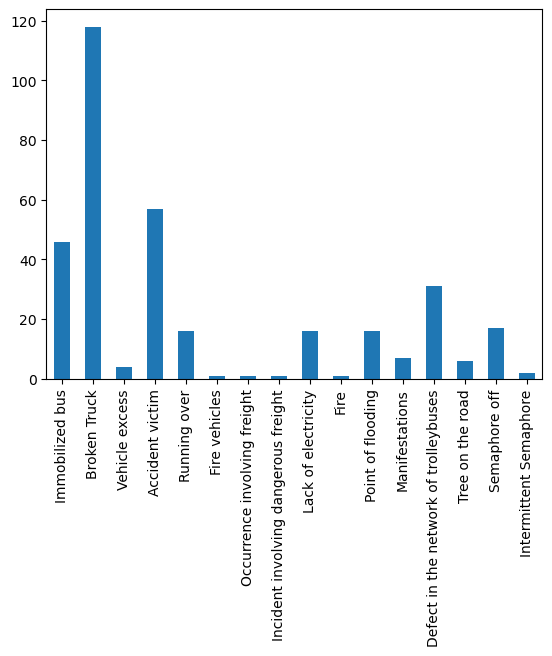

In [11]:
incidents.sum().plot.bar()
plt.show()

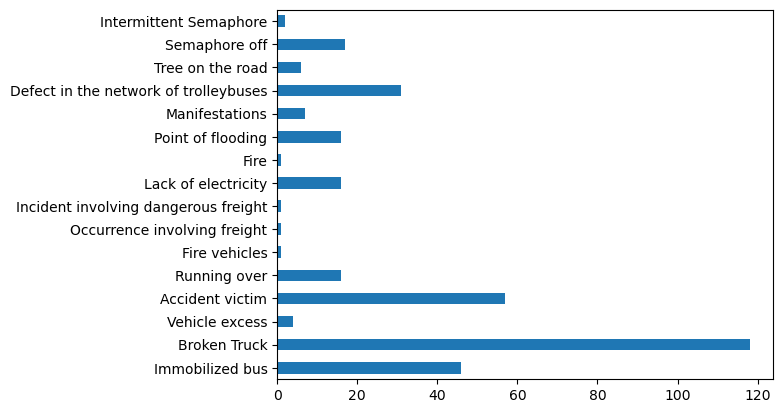

In [12]:
incidents.sum().plot.barh()
plt.show()

From our barchart we can summarize that
* The most frequent incident type is broken trucks.

In [13]:
traffic.corr()['Slowness in traffic (%)']

Hour (Coded)                             0.729962
Immobilized bus                          0.101143
Broken Truck                             0.131998
Vehicle excess                          -0.045297
Accident victim                          0.121730
Running over                            -0.001133
Fire vehicles                            0.134103
Occurrence involving freight             0.026791
Incident involving dangerous freight     0.000957
Lack of electricity                      0.436569
Fire                                    -0.046737
Point of flooding                        0.420016
Manifestations                           0.066377
Defect in the network of trolleybuses   -0.147035
Tree on the road                        -0.098489
Semaphore off                            0.347242
Intermittent Semaphore                  -0.119942
Slowness in traffic (%)                  1.000000
Name: Slowness in traffic (%), dtype: float64

Leaving out the Hour (Coded) column (which doesn't describe an incident type), Slowness in traffic (%) correlates most strongly with the following:

* Lack of electricity: +0.44
* Point of flooding: +0.42
* Semaphore off: +0.34

**Let's start with generating a scatter plot for Slowness in traffic (%) and Lack of electricity.**

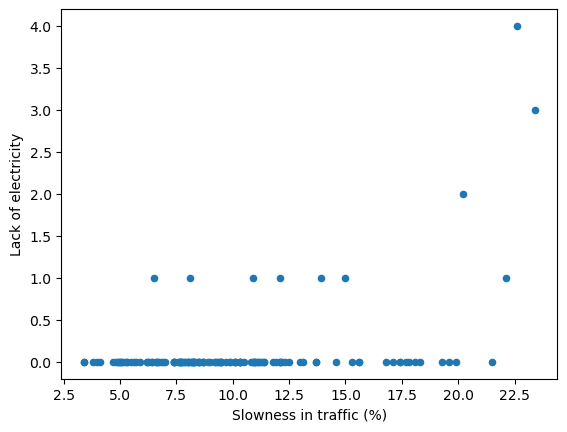

In [14]:
traffic.plot.scatter(x='Slowness in traffic (%)',
                     y='Lack of electricity')
plt.show()

The positive correlation is not very obvious on the scatter plot — although we see that when Lack of electricity increases to 2, 3 or 4, the traffic slowness percentage tends to increase as well.

**Slowness in traffic (%) and Point of flooding**

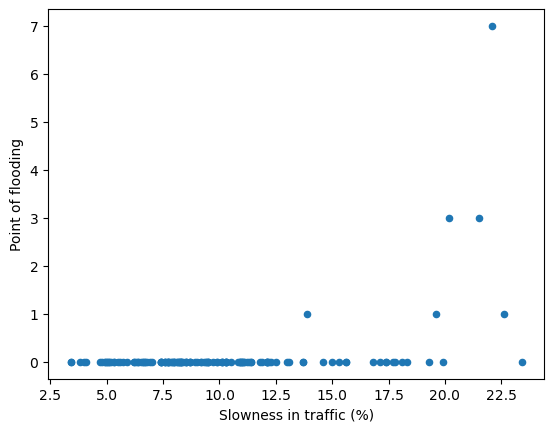

In [15]:
traffic.plot.scatter(x= 'Slowness in traffic (%)',
                     y = 'Point of flooding')
plt.show()

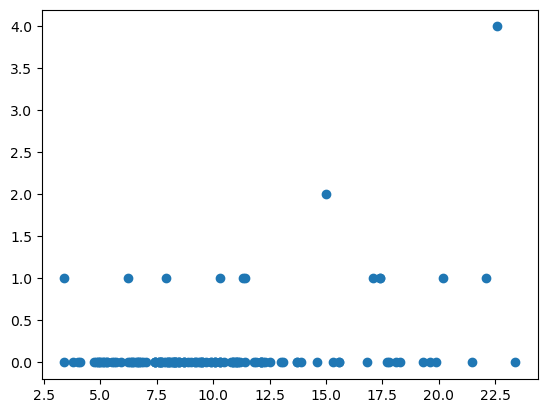

In [16]:
plt.scatter(traffic['Slowness in traffic (%)'],
            traffic['Semaphore off'])
plt.show()

From the above charts, we cannot really understand the charts

To look for more evidence, we're going to isolate all the rows where traffic slowness is 20% or more. Then, we're going to calculate and visualize the incident frequency.

In [17]:
slowness_20_or_more = traffic[traffic['Slowness in traffic (%)'] >= 20]

In [18]:
slowness_20_or_more = slowness_20_or_more.drop(['Slowness in traffic (%)', 'Hour (Coded)'], axis=1)

In [19]:
slowness_20_or_more

,Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore
77,0,1,0,0,0,0,0,0,2,0,3,0,0,0,1,0
78,1,3,0,2,0,0,0,0,4,0,1,0,0,0,4,0
79,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0
107,0,3,0,1,0,0,0,0,1,0,7,0,2,0,1,0


In [20]:
incident_frequencies = slowness_20_or_more.sum()

In [21]:
print(type(incident_frequencies))

<class 'pandas.core.series.Series'>


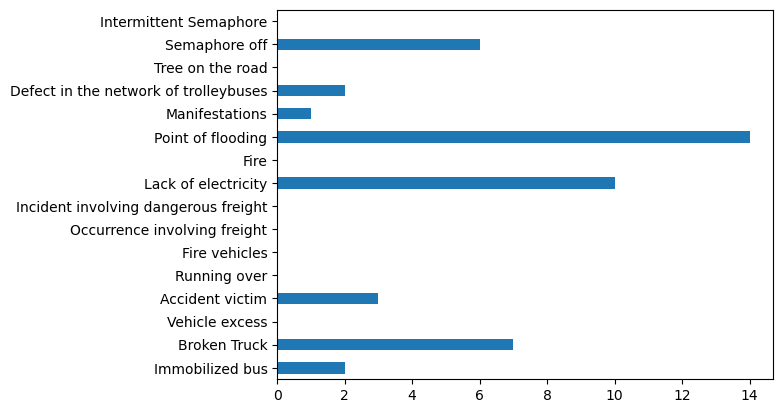

In [22]:
incident_frequencies.plot.barh()
plt.show()

One conclusion is that lack of electricity and flooding are probably two factors that are causing significant traffic problems. Nonfunctional semaphores also affect traffic, but they are probably a result of lack of electricity.

**The last Analysis we are going to do is how traffic slowness changes over the 7:00 – 20:00 time interval.**

First, we're going to isolate the data for each day — from Monday to Friday.

In [23]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
traffic_per_day = {}
for i, day in zip(range(0, 135, 27), days):
    each_day_traffic = traffic[i:i+27]
    traffic_per_day[day] = each_day_traffic

In [24]:
traffic_per_day['Monday'].head(3)

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7


In [25]:
traffic_per_day['Tuesday'].head(3)

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
27,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,4.9
28,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.3
29,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0


#### Using linecharts to check the traffic movement per day

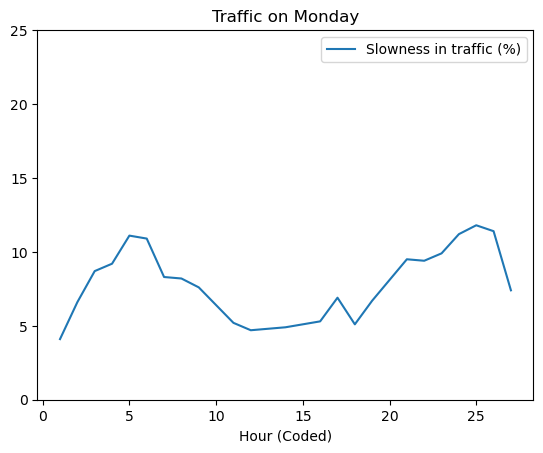

In [26]:
# For Monday
traffic_per_day['Monday'].plot.line(x='Hour (Coded)',
                                    y='Slowness in traffic (%)')
plt.ylim([0, 25])
plt.title('Traffic on Monday')
plt.show()

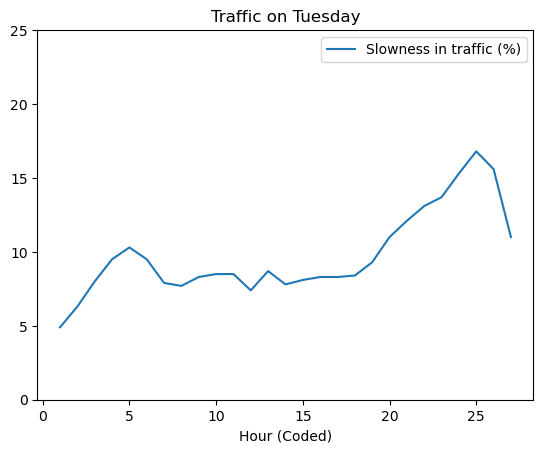

In [27]:
# For Tuesday
traffic_per_day['Tuesday'].plot.line(x='Hour (Coded)',
                                    y='Slowness in traffic (%)')
plt.ylim([0, 25])
plt.title('Traffic on Tuesday')
plt.show()

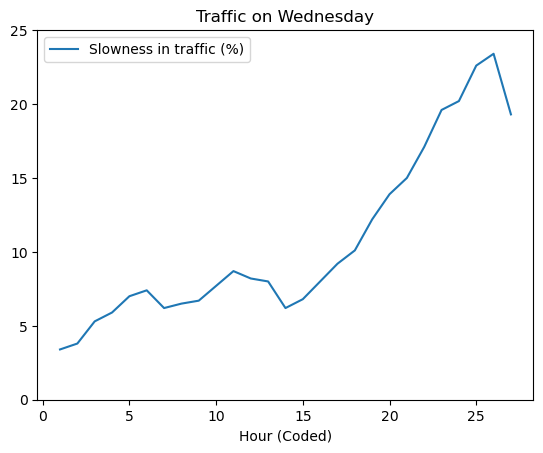

In [28]:
# For Wednesday
traffic_per_day['Wednesday'].plot.line(x='Hour (Coded)',
                                    y='Slowness in traffic (%)')
plt.ylim([0, 25])
plt.title('Traffic on Wednesday')
plt.show()

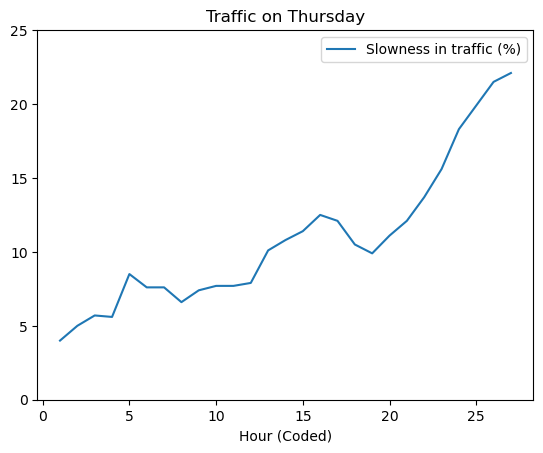

In [29]:
# For Thursday
traffic_per_day['Thursday'].plot.line(x='Hour (Coded)',
                                    y='Slowness in traffic (%)')
plt.ylim([0, 25])
plt.title('Traffic on Thursday')
plt.show()

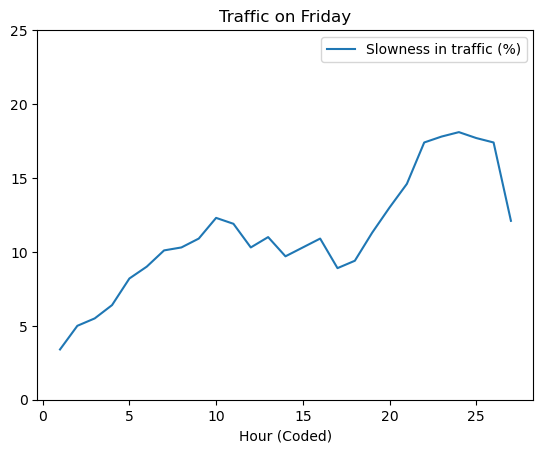

In [30]:
# For Friday
traffic_per_day['Friday'].plot.line(x='Hour (Coded)',
                                    y='Slowness in traffic (%)')
plt.ylim([0, 25])
plt.title('Traffic on Friday')
plt.show()

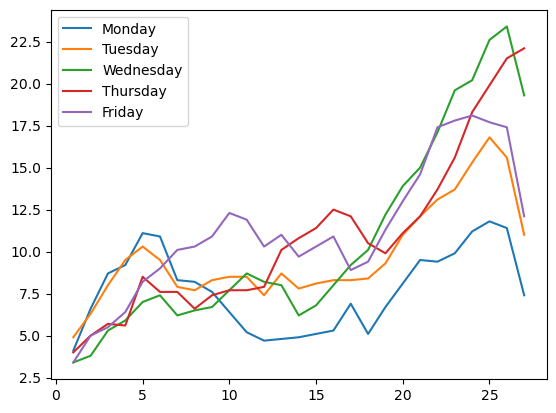

In [31]:
for day in days:
    plt.plot(traffic_per_day[day]['Hour (Coded)'],
             traffic_per_day[day]['Slowness in traffic (%)'],
             label=day)

plt.legend()
plt.show()

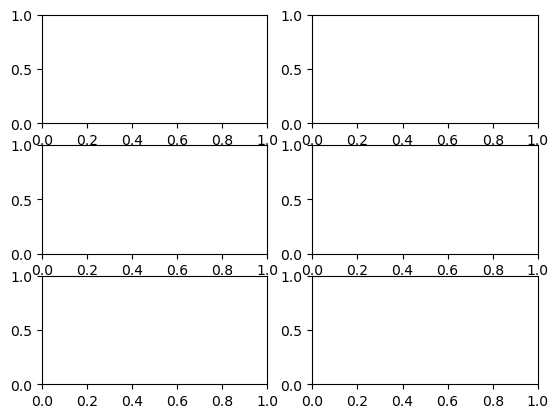

In [32]:
plt.figure()
plt.subplot(3, 2, 1)
plt.subplot(3, 2, 2)
plt.subplot(3, 2, 6)


plt.subplot(3, 2, 3)
plt.subplot(3, 2, 4)
plt.subplot(3, 2, 5)
plt.show()

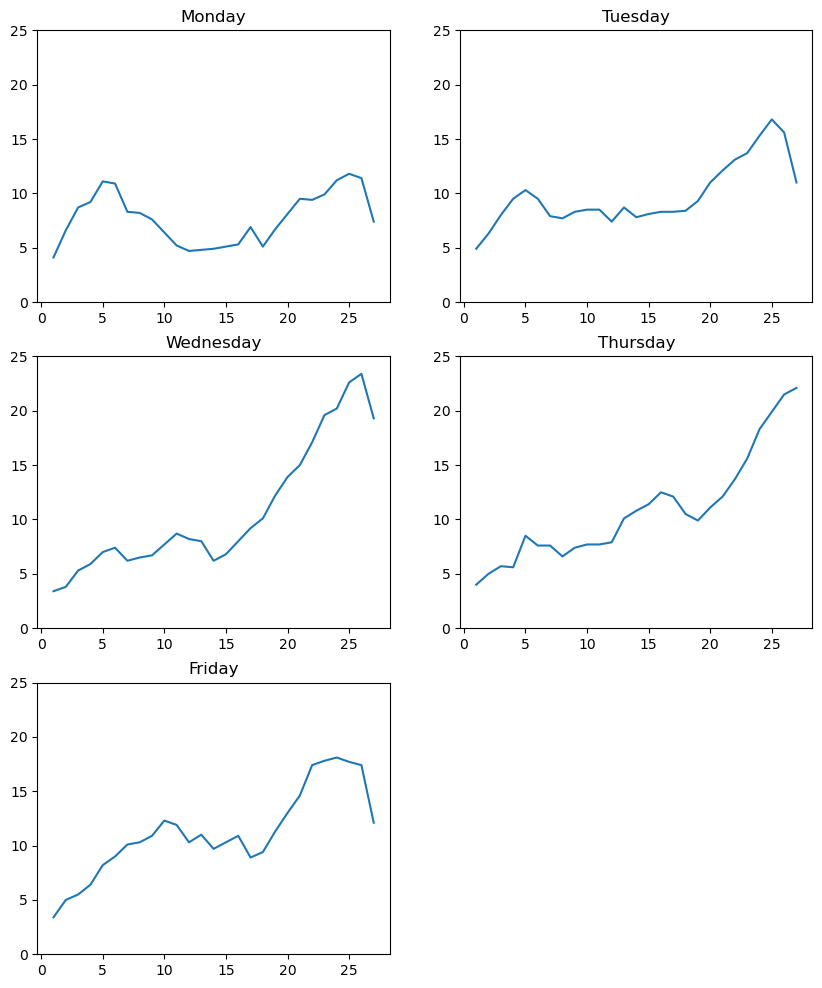

In [33]:
plt.figure(figsize=(10,12))

for i, day in zip(range(1,6), days):
    plt.subplot(3, 2, i)
    plt.plot(traffic_per_day[day]['Hour (Coded)'],
        traffic_per_day[day]['Slowness in traffic (%)'])
    plt.title(day)
    plt.ylim([0,25])
    
plt.show()

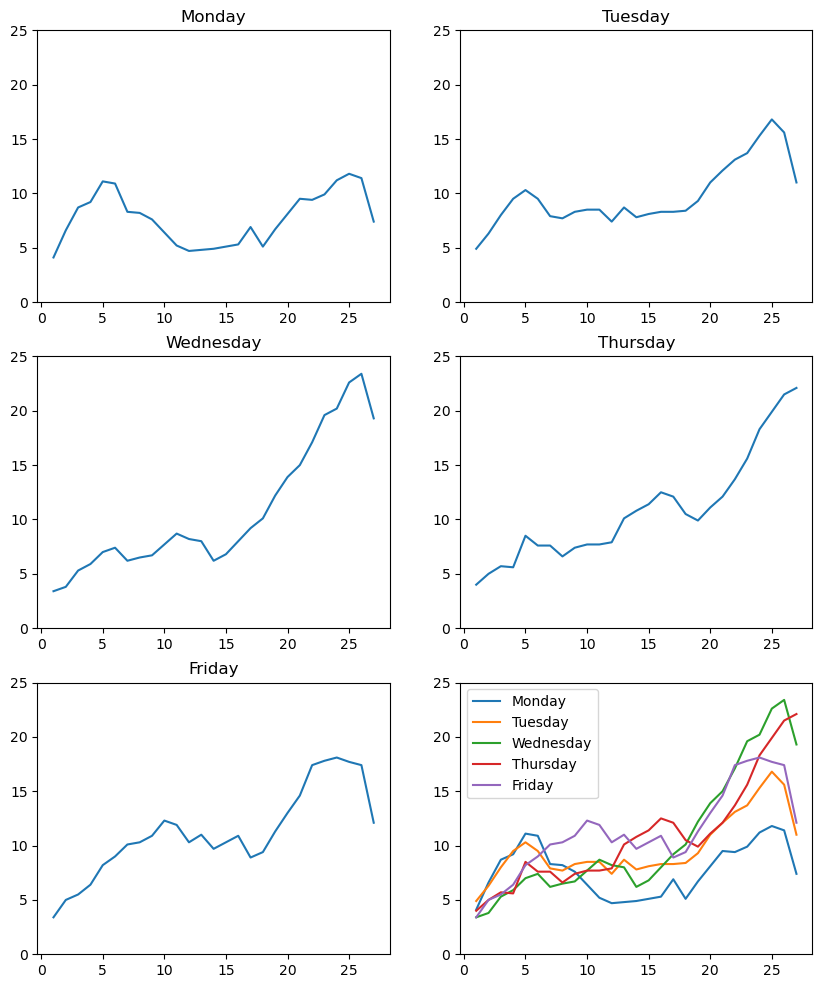

In [36]:
plt.figure(figsize=(10,12))

for i, day in zip(range(1,6), days):
    plt.subplot(3, 2, i)
    plt.plot(traffic_per_day[day]['Hour (Coded)'],
        traffic_per_day[day]['Slowness in traffic (%)'])
    plt.title(day)
    plt.ylim([0,25])
    
plt.subplot(3, 2, 6)

for day in days:
    plt.plot(traffic_per_day[day]['Hour (Coded)'],
             traffic_per_day[day]['Slowness in traffic (%)'],
             label=day)
    plt.ylim([0,25])
plt.legend()
plt.show()